In [107]:
from sklearn.neural_network import MLPRegressor
from sklearn import svm
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge

f_leftandright = open('leftandright', 'rb')
left_lst = []
right_lst = []
pan_lst = []
tilt_lst = []

for i in range(16139):
  left = f_leftandright.read(4)
  right = f_leftandright.read(4)
  pan = f_leftandright.read(4)
  tilt = f_leftandright.read(4)
  left_lst.append([int.from_bytes(left, byteorder = 'little' ,signed = True)])
  right_lst.append([int.from_bytes(right, byteorder = 'little' ,signed = True)])
  pan_lst.append([int.from_bytes(pan, byteorder = 'little' ,signed = True)])
  tilt_lst.append([int.from_bytes(tilt, byteorder = 'little' ,signed = True)])

f_offset = open('offset', 'rb')
panoff_lst = []
tiltoff_lst = []
rotateoff_lst = []
tranoff_lst = []

for i in range(16139):
  panoff = f_offset.read(4)
  tiltoff = f_offset.read(4)
  rotateoff = f_offset.read(4)
  tranoff = f_offset.read(4)
  panoff_lst.append([int.from_bytes(panoff, byteorder = 'little' ,signed = True)])
  tiltoff_lst.append([int.from_bytes(tiltoff, byteorder = 'little' ,signed = True)])
  rotateoff_lst.append([int.from_bytes(rotateoff, byteorder = 'little' ,signed = True)])
  tranoff_lst.append([int.from_bytes(tranoff, byteorder = 'little' ,signed = True)])

rotatecom = []
translatecom = []
for i in range(16139):
  rotatecom.append([(right_lst[i][0] - left_lst[i][0])/2])
  translatecom.append([(right_lst[i][0] + left_lst[i][0])/2])


In [108]:
size = 15000
test_num = 1000
datanum = 5
purpose_offset = panoff_lst
purpose_value = pan_lst

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(purpose_offset)
purpose_offset = scaler1.transform(purpose_offset)
scaler2 = MinMaxScaler().fit(purpose_value)
purpose_value = scaler2.transform(purpose_value)

In [110]:
input_lst = []
for i in range(size - datanum + 1):
  box=[]
  for j in range(i, i+datanum, 1):
    box.append(purpose_offset[j][0])
  input_lst.append(box)


label_lst = []
for i in range(datanum - 1, size, 1):
  label_lst.append(purpose_value[i])


In [111]:
print(input_lst)

[[0.4664310954063604, 0.46289752650176674, 0.4840989399293286, 0.48763250883392223, 0.48763250883392223], [0.46289752650176674, 0.4840989399293286, 0.48763250883392223, 0.48763250883392223, 0.3286219081272085], [0.4840989399293286, 0.48763250883392223, 0.48763250883392223, 0.3286219081272085, 0.33922261484098937], [0.48763250883392223, 0.48763250883392223, 0.3286219081272085, 0.33922261484098937, 0.34275618374558303], [0.48763250883392223, 0.3286219081272085, 0.33922261484098937, 0.34275618374558303, 0.3568904593639576], [0.3286219081272085, 0.33922261484098937, 0.34275618374558303, 0.3568904593639576, 0.3780918727915194], [0.33922261484098937, 0.34275618374558303, 0.3568904593639576, 0.3780918727915194, 0.46289752650176674], [0.34275618374558303, 0.3568904593639576, 0.3780918727915194, 0.46289752650176674, 0.4840989399293286], [0.3568904593639576, 0.3780918727915194, 0.46289752650176674, 0.4840989399293286, 0.5159010600706714], [0.3780918727915194, 0.46289752650176674, 0.4840989399293

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    input_lst, label_lst, test_size = 0.25, random_state=42)

In [113]:
print(len(X_train))
print(len(X_test))

11247
3749


In [114]:

# X = [[0., 0.], [1., 1.]]
# y = [0, 1]
clf = KernelRidge(alpha=5.0)


In [115]:
clf.fit(X_train, Y_train)

KernelRidge(alpha=5.0, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [116]:
clf.predict(X_test)


array([[0.4692812 ],
       [0.47686003],
       [0.5617512 ],
       ...,
       [0.50211011],
       [0.58809471],
       [0.63807899]])

R_square : [0.02616652]


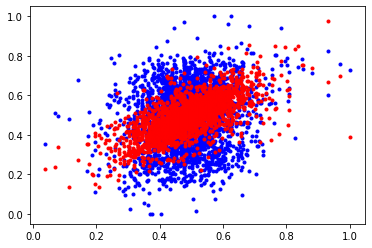

In [117]:
import matplotlib.pyplot as plt

y_hat = clf.predict(X_test)


SSE_lst = 0 
SST_lst = 0

sume = 0
for i in range(len(Y_test)):
  sume = sume + Y_test[i]

means = float(sume/len(Y_test))

for i in range(len(Y_test)):
  SSE_lst += (Y_test[i] - y_hat[i])**2
  SST_lst += (Y_test[i] - means)**2



R_square = 1 - (SSE_lst / SST_lst)

print("R_square :", R_square) 

input_encoded = []
for i in range(len(X_test)):
  input_encoded.append(X_test[i][datanum -1])

plt.plot(input_encoded, Y_test, '.', color = 'b') 
plt.plot(input_encoded, y_hat, '.', color = 'r') 

plt.show()

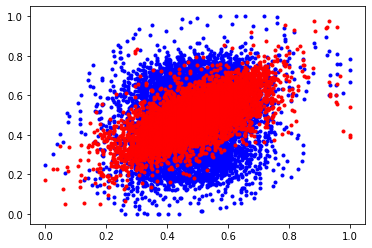

In [118]:
input_encoded = []
for i in range(len(input_lst)):
  input_encoded.append(input_lst[i][datanum -1])
y_hat_2 = clf.predict(input_lst)

plt.plot(input_encoded, label_lst, '.', color = 'b')
plt.plot(input_encoded, y_hat_2, '.', color = 'r')
plt.show()